<a href="https://colab.research.google.com/github/BB-3022/DeepLearning/blob/main/%ED%99%9C%EC%84%B1%ED%99%94%ED%95%A8%EC%88%98%2C_%EC%B5%9C%EC%A0%81%ED%99%94%ED%95%A8%EC%88%98%2Ccallback%ED%95%A8%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- 활성화함수와 경사하강법 최적의 조합을 확인해보자
- 모델링에 도움이 되는 callback 함수 (모델저장, 조기학습중단)을 알아보자!

##### 데이터 로딩

In [41]:
# keras 에서 제공해주는 손글씨데이터 불러오기
from tensorflow.keras.datasets import mnist

In [42]:
# 데이터 분리
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [43]:
# 크기확인
(X_train.shape, y_train.shape),(X_test.shape,y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

### 활성화 함수와 경사하강법 조합에 따른 성능비교
1. sigmoid + SGD 조합
2. relu + SGD 조합
3. relu + Adam 조합

In [44]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
# 딥러닝 라이브러리 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Flatten
from tensorflow.keras.optimizers import SGD, Adam #경사하강법 클래스

### 1. sigmoid + SGD 조합

In [46]:
# 1. 신경망 설계

# 뼈대
model1  = Sequential()

# 입력층
model1.add(Flatten())
#model1.add(InputLayer (input_shape = (28,28))) # 28*28의 2차원 데이터

# 중간층
model1.add(Dense(units = 64, activation = 'sigmoid'))
model1.add(Dense(units = 128, activation = 'sigmoid'))
model1.add(Dense(units = 256, activation = 'sigmoid'))
model1.add(Dense(units = 128, activation = 'sigmoid'))
model1.add(Dense(units = 64, activation = 'sigmoid'))

# 출력층
model1.add(Dense(units = 10, activation = 'softmax'))

In [47]:
# 2. 학습방법 및 평가방법 설정
model1.compile(loss='sparse_categorical_crossentropy',
               optimizer = SGD(learning_rate=0.01), #SGD 기본학습률 : 0.01
               metrics = ['accuracy'])

In [48]:
# 3. 모델 학습
h1 = model1.fit(X_train, y_train,
                validation_split=0.2,
                epochs = 20,
                batch_size = 128)

Epoch 1/20
375/375 [==============================] - 3s 7ms/step - loss: 2.3140 - accuracy: 0.1084 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3014 - val_accuracy: 0.1060
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 2.3009 - accuracy: 0.1136 - val_loss: 2.3013 - val_accuracy: 0.1060
Epoch 4/20
375/375 [==============================] - 3s 7ms/step - loss: 2.3006 - accuracy: 0.1136 - val_loss: 2.3023 - val_accuracy: 0.1060
Epoch 5/20
375/375 [==============================] - 3s 9ms/step - loss: 2.3006 - accuracy: 0.1140 - val_loss: 2.3018 - val_accuracy: 0.1060
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 2.3005 - accuracy: 0.1132 - val_loss: 2.3017 - val_accuracy: 0.1060
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 2.3003 - accuracy: 0.1140 - val_loss: 2.3011 - val_accuracy: 0.1060
Epoch 

### 2. relu + SGD 조합

In [49]:
# 1. 신경망 설계

# 뼈대
model2  = Sequential()

# 입력층
model2.add(Flatten())
#model1.add(InputLayer (input_shape = (28,28))) # 28*28의 2차원 데이터

# 중간층
model2.add(Dense(units = 64, activation = 'relu'))
model2.add(Dense(units = 128, activation = 'relu'))
model2.add(Dense(units = 256, activation = 'relu'))
model2.add(Dense(units = 128, activation = 'relu'))
model2.add(Dense(units = 64, activation = 'relu'))

# 출력층
model2.add(Dense(units = 10, activation = 'softmax'))

In [50]:
# 2. 학습방법 및 평가방법 설정
model2.compile(loss='sparse_categorical_crossentropy',
               optimizer = SGD(learning_rate=0.01), #SGD 기본학습률 : 0.01
               metrics = ['accuracy'])

In [51]:
# 3. 모델 학습
h2 = model2.fit(X_train, y_train,
                validation_split=0.2,
                epochs = 20,
                batch_size = 128)

Epoch 1/20
375/375 [==============================] - 3s 7ms/step - loss: 4.4660 - accuracy: 0.3906 - val_loss: 1.1345 - val_accuracy: 0.6709
Epoch 2/20
375/375 [==============================] - 3s 9ms/step - loss: 0.8754 - accuracy: 0.7287 - val_loss: 0.7606 - val_accuracy: 0.7505
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 0.4979 - accuracy: 0.8489 - val_loss: 0.4449 - val_accuracy: 0.8621
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.4071 - accuracy: 0.8784 - val_loss: 0.3781 - val_accuracy: 0.8827
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.3485 - accuracy: 0.8958 - val_loss: 0.3721 - val_accuracy: 0.8909
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.3080 - accuracy: 0.9074 - val_loss: 0.2948 - val_accuracy: 0.9087
Epoch 7/20
375/375 [==============================] - 3s 8ms/step - loss: 0.2748 - accuracy: 0.9180 - val_loss: 0.2544 - val_accuracy: 0.9202
Epoch 

### 3. relu + Adam

In [52]:
# 1. 신경망 설계

# 뼈대
model3  = Sequential()

# 입력층
model3.add(Flatten())
#model1.add(InputLayer (input_shape = (28,28))) # 28*28의 2차원 데이터

# 중간층
model3.add(Dense(units = 64, activation = 'relu'))
model3.add(Dense(units = 128, activation = 'relu'))
model3.add(Dense(units = 256, activation = 'relu'))
model3.add(Dense(units = 128, activation = 'relu'))
model3.add(Dense(units = 64, activation = 'relu'))

# 출력층
model3.add(Dense(units = 10, activation = 'softmax'))

In [53]:
# 2. 학습방법 및 평가방법 설정
model3.compile(loss='sparse_categorical_crossentropy',
               optimizer = Adam(learning_rate=0.001), #Adam 기본학습률 : 0.001
               metrics = ['accuracy'])

In [54]:
# 3. 모델 학습
h3 = model3.fit(X_train, y_train,
                validation_split=0.2,
                epochs = 20,
                batch_size = 128)

Epoch 1/20
375/375 [==============================] - 4s 8ms/step - loss: 0.9436 - accuracy: 0.8160 - val_loss: 0.3041 - val_accuracy: 0.9101
Epoch 2/20
375/375 [==============================] - 4s 10ms/step - loss: 0.2366 - accuracy: 0.9296 - val_loss: 0.2505 - val_accuracy: 0.9278
Epoch 3/20
375/375 [==============================] - 3s 7ms/step - loss: 0.1721 - accuracy: 0.9473 - val_loss: 0.1962 - val_accuracy: 0.9432
Epoch 4/20
375/375 [==============================] - 3s 7ms/step - loss: 0.1348 - accuracy: 0.9593 - val_loss: 0.1809 - val_accuracy: 0.9507
Epoch 5/20
375/375 [==============================] - 3s 7ms/step - loss: 0.1110 - accuracy: 0.9659 - val_loss: 0.1519 - val_accuracy: 0.9565
Epoch 6/20
375/375 [==============================] - 3s 7ms/step - loss: 0.1013 - accuracy: 0.9682 - val_loss: 0.1541 - val_accuracy: 0.9563
Epoch 7/20
375/375 [==============================] - 4s 10ms/step - loss: 0.0844 - accuracy: 0.9738 - val_loss: 0.1549 - val_accuracy: 0.9578
Epoc

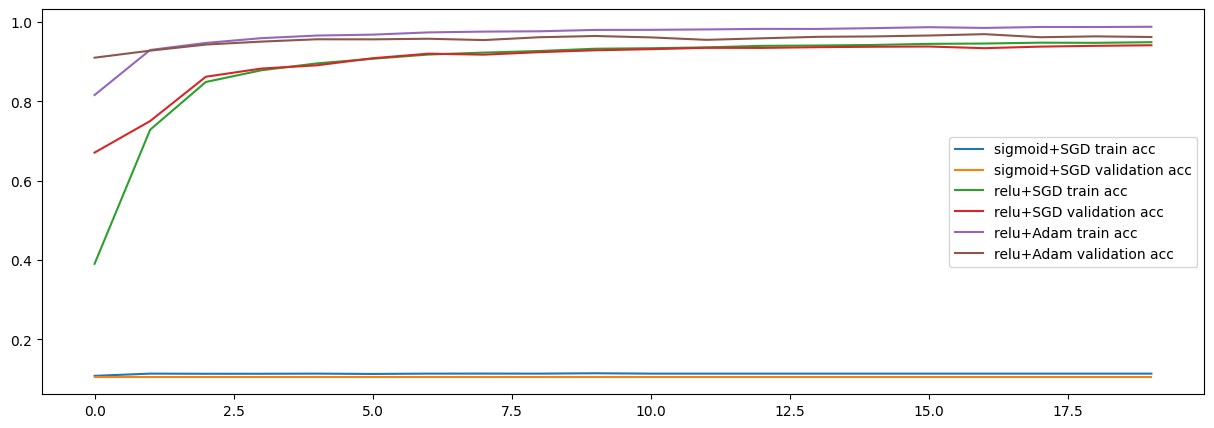

In [55]:
plt.figure(figsize=(15,5))
# sigmoid + SGD 조합
plt.plot(h1.history['accuracy'], label="sigmoid+SGD train acc")
plt.plot(h1.history['val_accuracy'], label="sigmoid+SGD validation acc")
# relu + SGD 조합
plt.plot(h2.history['accuracy'], label="relu+SGD train acc")
plt.plot(h2.history['val_accuracy'], label="relu+SGD validation acc")
# relu + Adam 조합
plt.plot(h3.history['accuracy'], label="relu+Adam train acc")
plt.plot(h3.history['val_accuracy'], label="relu+Adam validation acc")

plt.legend()
plt.show()

### callback 함수
- 모델저장 및 조기학습중단
- 모델저장 (ModelCheckPoint)
  - 딥러닝모델 학습시 지정된 epoch 를 다 끝내면 과대적합이 일어나는 경우가 있다.
    -> 중간에 일반화된 모델을 저장할 수 있는 기능!
- 조기학습 중단 (EarlyStopping)
  - epoch 를 크게 설정할 경우 일정횟수 이상으로는 모델의 성능이 개선되지 않는 경우가 있다.-> 시간낭비 -> 모델의 성능이 개선되지 않는 경우에는 조기중단이 필요

In [56]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# 모델 중간 저장
# 모델 중간 멈춤

In [57]:
# 모델 저장
# 저장될 경로 작성
model_path = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/data/digit_model/dm_{epoch:02d}_{val_accuracy:0.2f}.hdf5'
mckp = ModelCheckpoint(filepath = model_path, #저장경로
                verbose = 1, #로그 출력 -> 1 : 로그출력 0
                save_best_only = True, #모델성능이 최고점을 갱신할때마다 저장
                monitor = 'val_accuracy') #최고점의 기준치

# 콜백객체 생성완료
# 사용한것은 아님!

In [58]:
# 조기학습 중단
early = EarlyStopping(monitor = 'val_accuracy', # 기준치
                      verbose = 1, # 로그출력
                      patience = 10) #모델성능개선을 기다리는 최대 횟수

In [60]:
# 3번째 조합으로 모델링
# 1. 신경망 설계

# 뼈대
model3  = Sequential()

# 입력층
model3.add(Flatten())
#model1.add(InputLayer (input_shape = (28,28))) # 28*28의 2차원 데이터

# 중간층
model3.add(Dense(units = 64, activation = 'relu'))
model3.add(Dense(units = 128, activation = 'relu'))
model3.add(Dense(units = 256, activation = 'relu'))
model3.add(Dense(units = 128, activation = 'relu'))
model3.add(Dense(units = 64, activation = 'relu'))

# 출력층
model3.add(Dense(units = 10, activation = 'softmax'))

# 2. 학습방법 및 평가방법 설정
model3.compile(loss='sparse_categorical_crossentropy',
               optimizer = Adam(learning_rate=0.001), #Adam 기본학습률 : 0.001
               metrics = ['accuracy'])

# 3. 모델 학습
h3 = model3.fit(X_train, y_train,
                validation_split=0.2,
                epochs = 1000,
                batch_size = 128,
                callbacks = [mckp, early])

Epoch 1/1000
368/375 [============================>.] - ETA: 0s - loss: 0.8104 - accuracy: 0.8170
Epoch 1: val_accuracy improved from -inf to 0.92525, saving model to /content/drive/MyDrive/Colab Notebooks/DeepLearning/data/digit_model/dm_01_0.93.hdf5
375/375 [==============================] - 4s 8ms/step - loss: 0.8001 - accuracy: 0.8189 - val_loss: 0.2543 - val_accuracy: 0.9252
Epoch 2/1000
 19/375 [>.............................] - ETA: 2s - loss: 0.2451 - accuracy: 0.9293

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


370/375 [============================>.] - ETA: 0s - loss: 0.2209 - accuracy: 0.9336
Epoch 2: val_accuracy improved from 0.92525 to 0.93967, saving model to /content/drive/MyDrive/Colab Notebooks/DeepLearning/data/digit_model/dm_02_0.94.hdf5
375/375 [==============================] - 3s 7ms/step - loss: 0.2202 - accuracy: 0.9340 - val_loss: 0.2088 - val_accuracy: 0.9397
Epoch 3/1000
371/375 [============================>.] - ETA: 0s - loss: 0.1574 - accuracy: 0.9520
Epoch 3: val_accuracy improved from 0.93967 to 0.94608, saving model to /content/drive/MyDrive/Colab Notebooks/DeepLearning/data/digit_model/dm_03_0.95.hdf5
375/375 [==============================] - 3s 7ms/step - loss: 0.1570 - accuracy: 0.9522 - val_loss: 0.1961 - val_accuracy: 0.9461
Epoch 4/1000
374/375 [============================>.] - ETA: 0s - loss: 0.1193 - accuracy: 0.9634
Epoch 4: val_accuracy improved from 0.94608 to 0.95692, saving model to /content/drive/MyDrive/Colab Notebooks/DeepLearning/data/digit_model/dm

### 가장우수한 모델 불러오기


In [61]:
from tensorflow.keras.models import load_model

In [62]:
# 이미 학습된 모델
best_model = load_model('/content/drive/MyDrive/Colab Notebooks/DeepLearning/data/digit_model/dm_28_0.97.hdf5')

In [ ]:
# 평